In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adusts the configuration of the plots we will create

In [2]:
# Reading Data
movie = pd.read_csv('movies.csv')
movie.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [3]:
# Finding Missing Values
movie.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [4]:
# Lets Drop missing values
movie.dropna(inplace=True)
movie.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [5]:
# Data types of columns
movie.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
# Change Data Type of colums
movie['votes'] = movie['votes'].astype('int64')
movie['budget'] = movie['budget'].astype('int64')
movie['gross'] = movie['gross'].astype('int64')
movie['runtime'] = movie['runtime'].astype('int64')

In [25]:
movie.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime release_year release_country  
0   46998772        Warner Bros.      146         1980   United States  
1   58853106   Columbia Pictures      104         1980   United States  
2  538375067           Lucasfilm      124         1980   United States  
3   83453539  Paramount Pictures       88         1980   United States  
4   39846344      Orion Pictures       98         1980   United States

In [8]:
# Extract release year and release country
movie['release_year'] = movie['released'].str.extract('(\d{4})')
movie['release_country'] = movie['released'].str.split('(', expand=True)[1].str[:-1]

In [28]:
# sorted values by gross
#pd.set_option('display.max_rows', None) # To show all values
movie.sort_values(by=['gross'], inplace=False, ascending=False)

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
6311                                    Despicable Me 2         PG  Animation   
6

In [10]:
# Drop Duplicates
movie.drop_duplicates()
movie['company']

0                              Warner Bros.
1                         Columbia Pictures
2                                 Lucasfilm
3                        Paramount Pictures
4                            Orion Pictures
                       ...                 
7648                      Columbia Pictures
7649                     Paramount Pictures
7650                     Universal Pictures
7651                   20th Century Studios
7652    Beijing Diqi Yinxiang Entertainment
Name: company, Length: 5421, dtype: object

In [26]:
movie.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime release_year release_country  
0   46998772        Warner Bros.      146         1980   United States  
1   58853106   Columbia Pictures      104         1980   United States  
2  538375067           Lucasfilm      124         1980   United States  
3   83453539  Paramount Pictures       88         1980   United States  
4   39846344      Orion Pictures       98         1980   United States

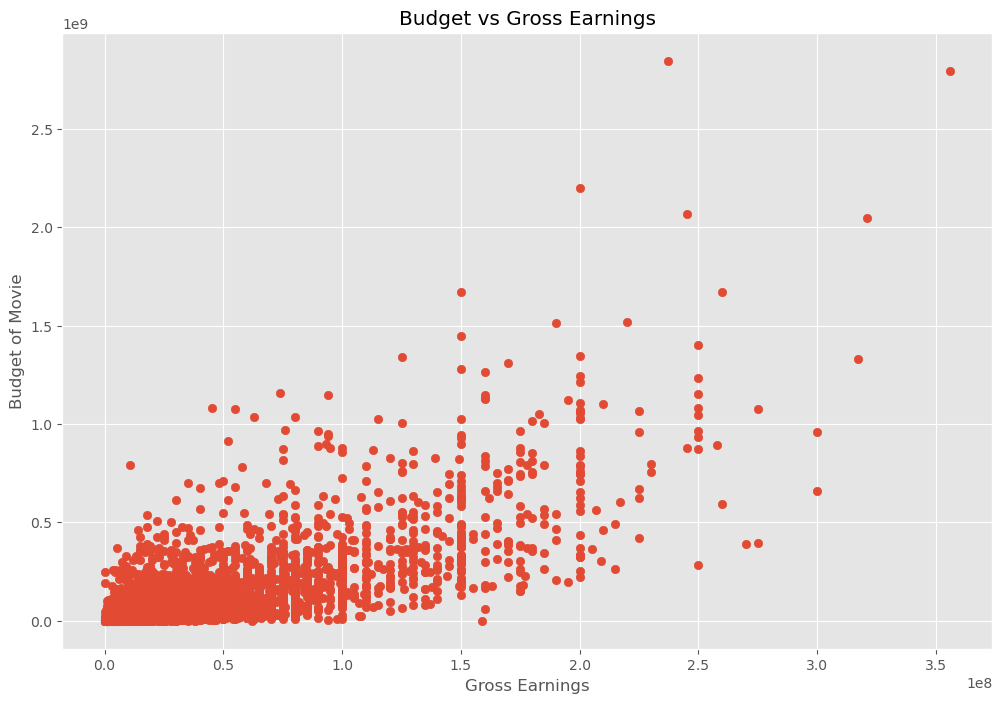

In [12]:
# Scatter Plot with Budget VS Gross

plt.scatter(x='budget', y='gross', data=movie)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget of Movie')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

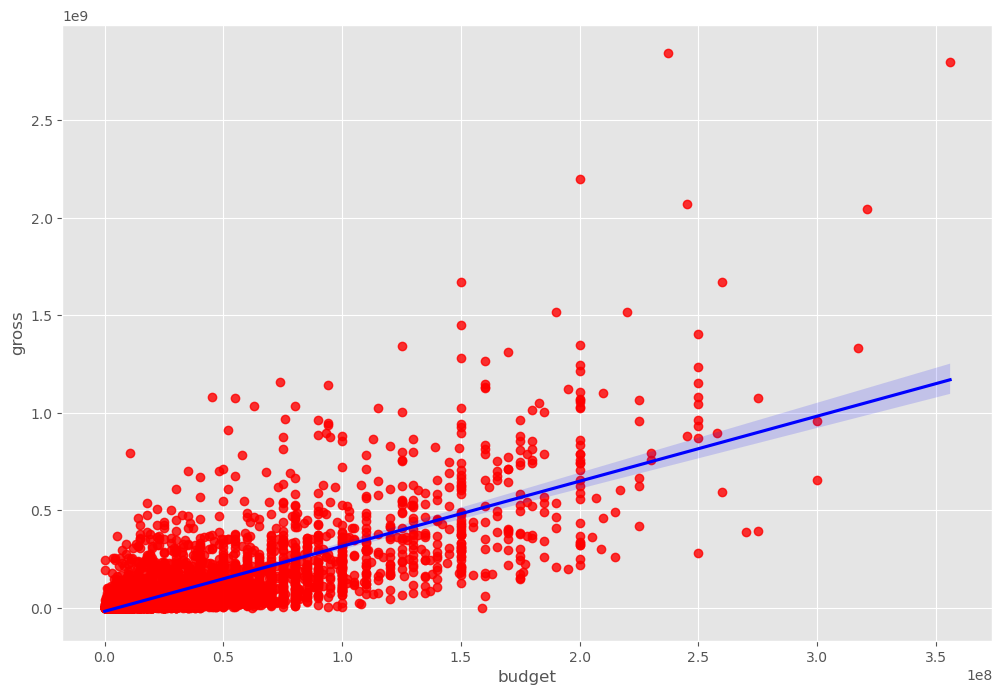

In [13]:
# Plot Budget vs Gross using seaborn

sns.regplot(x='budget', y='gross', data=movie, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [14]:
# Let's start looking at correlation
movie.corr(method='pearson') #methods pearson, kendall, spearman for correlation

year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000

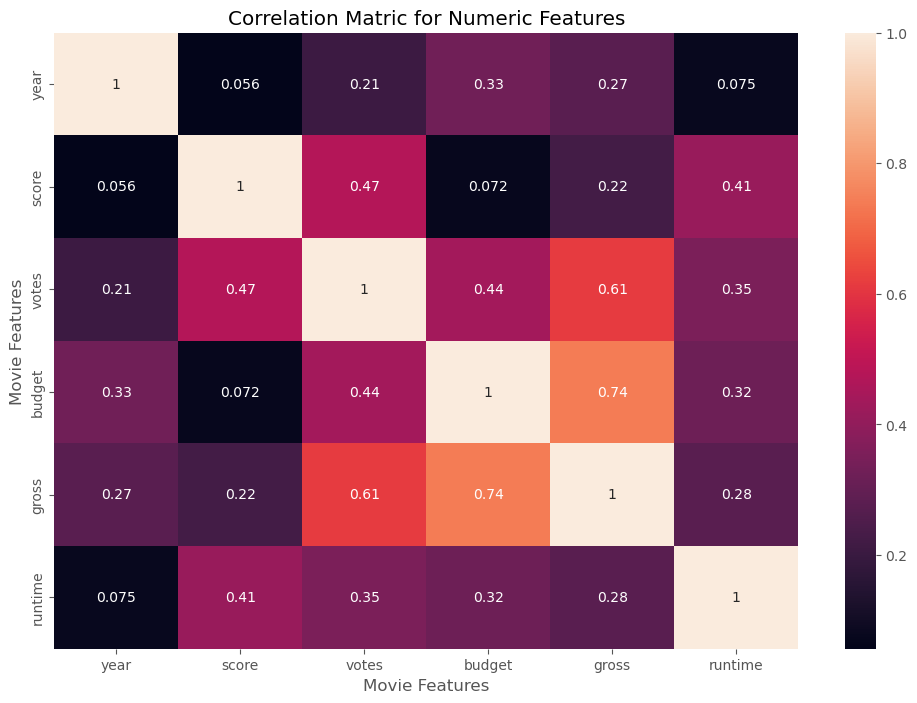

In [15]:
#High Correlation between budget and gross
correlation_matrix = movie.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [16]:
# Categorizing non-numerice feature Like company
movie_dummies = movie.copy()

for col_name in movie_dummies.columns:
    if(movie_dummies[col_name].dtype == 'object'):
        movie_dummies[col_name] = movie_dummies[col_name].astype('category')
        movie_dummies[col_name] = movie_dummies[col_name].cat.codes
        
movie_dummies

name  rating  genre  year  released  score    votes  director  writer  \
0     4692       6      6  1980      1304    8.4   927000      1795    2832   
1     3929       6      1  1980      1127    5.8    65000      1578    1158   
2     3641       4      0  1980      1359    8.7  1200000       757    1818   
3      204       4      4  1980      1127    7.7   221000       889    1413   
4      732       6      4  1980      1170    7.3   108000       719     351   
...    ...     ...    ...   ...       ...    ...      ...       ...     ...   
7648   415       6      0  2020       904    6.6   140000        16    2390   
7649  3556       4      0  2020       713    6.5   102000       852    2309   
7650  1153       4      1  2020       904    5.6    53000      1809    2827   
7651  3978       4      1  2020       758    6.8    42000       294    2091   
7652  4090       3      0  2020       370    6.8     3700       746    1184   

      star  country     budget      gross  company  runtime  release_year  \
0      699       46   19000000   46998772     1426      146             0   
1      214       47    4500000   58853106      452      104             0   
2     1157       47   18000000  538375067      945      124             0   
3     1474       47    3500000   83453539     1108       88             0   
4      271       47    6000000   39846344     1083       98             0   
...    ...      ...        ...        ...      ...      ...           ...   
7648  1812       47   90000000  426505244      452      124            40   
7649   147       47   85000000  319715683     1108       99            40   
7650  1470       47  175000000  245487753     1397      101            40   
7651   640        6  135000000  111105497       12      100            40   
7652  1839        8   80000000  461421559      228      149            40   

      release_country  
0                  47  
1                  47  
2                  47  
3                  47  
4                  47  
...               ...  
7648               47  
7649               47  
7650               47  
7651               47  
7652               47  

[5421 rows x 17 columns]

In [27]:
movie.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime release_year release_country  
0   46998772        Warner Bros.      146         1980   United States  
1   58853106   Columbia Pictures      104         1980   United States  
2  538375067           Lucasfilm      124         1980   United States  
3   83453539  Paramount Pictures       88         1980   United States  
4   39846344      Orion Pictures       98         1980   United States

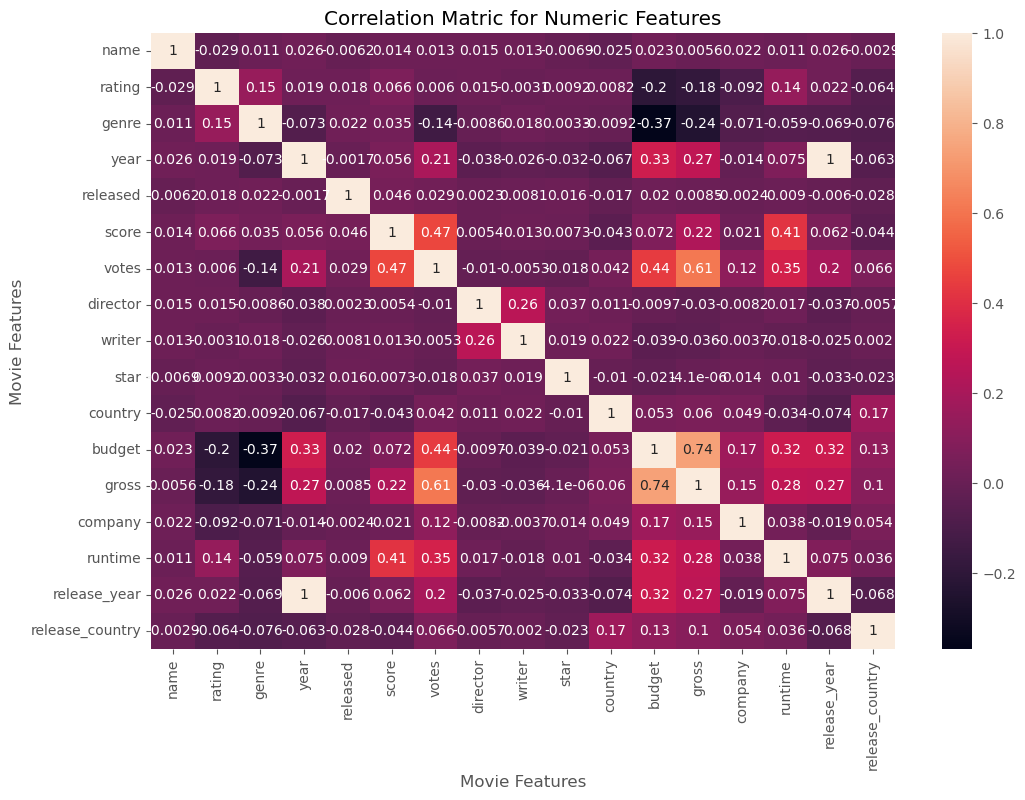

In [18]:
#Correlation Heatmap
correlation_matrix = movie_dummies.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [19]:
movie_dummies.corr()

name    rating     genre      year  released     score  \
name             1.000000 -0.029234  0.010996  0.025542 -0.006152  0.014450   
rating          -0.029234  1.000000  0.147796  0.019499  0.018083  0.065983   
genre            0.010996  0.147796  1.000000 -0.073167  0.022142  0.035106   
year             0.025542  0.019499 -0.073167  1.000000 -0.001740  0.056386   
released        -0.006152  0.018083  0.022142 -0.001740  1.000000  0.045874   
score            0.014450  0.065983  0.035106  0.056386  0.045874  1.000000   
votes            0.012615  0.006031 -0.135990  0.206021  0.028833  0.474256   
director         0.015246  0.014656 -0.008553 -0.038354  0.002308  0.005413   
writer           0.012880 -0.003149  0.017578 -0.025908  0.008072  0.012843   
star            -0.006882  0.009196  0.003341 -0.032157  0.015706  0.007296   
country         -0.025490  0.008230 -0.009164 -0.066748 -0.017228 -0.043051   
budget           0.023392 -0.203946 -0.368523  0.327722  0.019952  0.072001   
gross            0.005639 -0.181906 -0.244101  0.274321  0.008501  0.222556   
company          0.021697 -0.092357 -0.071334 -0.014333 -0.002407  0.020656   
runtime          0.010850  0.140792 -0.059237  0.075077  0.008975  0.414068   
release_year     0.025542  0.022021 -0.069147  0.998726 -0.005989  0.061923   
release_country -0.002908 -0.063883 -0.075552 -0.062768 -0.027578 -0.043528   

                    votes  director    writer      star   country    budget  \
name             0.012615  0.015246  0.012880 -0.006882 -0.025490  0.023392   
rating           0.006031  0.014656 -0.003149  0.009196  0.008230 -0.203946   
genre           -0.135990 -0.008553  0.017578  0.003341 -0.009164 -0.368523   
year             0.206021 -0.038354 -0.025908 -0.032157 -0.066748  0.327722   
released         0.028833  0.002308  0.008072  0.015706 -0.017228  0.019952   
score            0.474256  0.005413  0.012843  0.007296 -0.043051  0.072001   
votes            1.000000 -0.010376 -0.005316 -0.017638  0.041551  0.439675   
director        -0.010376  1.000000  0.261735  0.036593  0.011133 -0.009662   
writer          -0.005316  0.261735  1.000000  0.018520  0.022488 -0.039466   
star            -0.017638  0.036593  0.018520  1.000000 -0.009990 -0.021473   
country          0.041551  0.011133  0.022488 -0.009990  1.000000  0.052977   
budget           0.439675 -0.009662 -0.039466 -0.021473  0.052977  1.000000   
gross            0.614751 -0.029560 -0.035885 -0.000004  0.060078  0.740247   
company          0.118470 -0.008223 -0.003697  0.014082  0.048569  0.170235   
runtime          0.352303  0.017433 -0.017561  0.010108 -0.034477  0.318695   
release_year     0.203098 -0.037371 -0.025495 -0.032687 -0.073569  0.320312   
release_country  0.066105 -0.005705  0.001983 -0.023346  0.167894  0.126976   

                    gross   company   runtime  release_year  release_country  
name             0.005639  0.021697  0.010850      0.025542        -0.002908  
rating          -0.181906 -0.092357  0.140792      0.022021        -0.063883  
genre           -0.244101 -0.071334 -0.059237     -0.069147        -0.075552  
year             0.274321 -0.014333  0.075077      0.998726        -0.062768  
released         0.008501 -0.002407  0.008975     -0.005989        -0.027578  
score            0.222556  0.020656  0.414068      0.061923        -0.043528  
votes            0.614751  0.118470  0.352303      0.203098         0.066105  
director        -0.029560 -0.008223  0.017433     -0.037371        -0.005705  
writer          -0.035885 -0.003697 -0.017561     -0.025495         0.001983  
star            -0.000004  0.014082  0.010108     -0.032687        -0.023346  
country          0.060078  0.048569 -0.034477     -0.073569         0.167894  
budget           0.740247  0.170235  0.318695      0.320312         0.126976  
gross            1.000000  0.149553  0.275796      0.268721         0.100029  
company          0.149553  1.000000  0.037585     -0.018806         0

In [22]:
correlation_mat = movie_dummies.corr()
corr_pairs =  correlation_mat.unstack()
corr_pairs

name             name               1.000000
                 rating            -0.029234
                 genre              0.010996
                 year               0.025542
                 released          -0.006152
                 score              0.014450
                 votes              0.012615
                 director           0.015246
                 writer             0.012880
                 star              -0.006882
                 country           -0.025490
                 budget             0.023392
                 gross              0.005639
                 company            0.021697
                 runtime            0.010850
                 release_year       0.025542
                 release_country   -0.002908
rating           name              -0.029234
                 rating             1.000000
                 genre              0.147796
                 year               0.019499
                 released           0.018083
          

In [24]:
sorted_paris = corr_pairs.sort_values()
sorted_paris

budget           genre             -0.368523
genre            budget            -0.368523
                 gross             -0.244101
gross            genre             -0.244101
budget           rating            -0.203946
rating           budget            -0.203946
gross            rating            -0.181906
rating           gross             -0.181906
votes            genre             -0.135990
genre            votes             -0.135990
rating           company           -0.092357
company          rating            -0.092357
genre            release_country   -0.075552
release_country  genre             -0.075552
release_year     country           -0.073569
country          release_year      -0.073569
year             genre             -0.073167
genre            year              -0.073167
company          genre             -0.071334
genre            company           -0.071334
                 release_year      -0.069147
release_year     genre             -0.069147
          

In [ ]:
# Votes and buget have the highest correlation to gross earnings
# company has low correation